<a href="https://colab.research.google.com/github/vishalsahuu/Global-Terrorism-Analysis-/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

## **Data Preparation and Cleaning** 

### Importing Dependencies 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Dataset Using Pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gtd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Global Terrorism Data.csv',encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Looking for some information about the data & the columns

In [ ]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
gtd.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
#finding the shape of data
gtd.shape

(181691, 135)

### Fixing any null or incorrect values

In [ ]:
# looking for null percentage in each column
null_columns = (gtd.isnull().sum()/len(gtd))*100
print(null_columns)
null_columns = null_columns.sort_values(ascending=False)
highly_null_columns = null_columns[null_columns>=50]
less_null_columns = null_columns[~null_columns.isin(highly_null_columns)]
less_null_columns = less_null_columns.index.to_list()
df = gtd[less_null_columns] 
df.columns

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64


Index(['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1',
       'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1',
       'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt',
       'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1',
       'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity',
       'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth',
       'targtype1_txt', 'gname', 'individual', 'dbsource', 'country',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt',
       'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1',
       'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity',
       'suicide', 'success', 'crit3', 'property', 'eventid'],
      dtype='object')

In [ ]:
# renaming the columns with appropriate names
gtd.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                         'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                         'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
# filtering the columns
gtd_df = gtd[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

### Overview of the filtered Dataset

In [ ]:
gtd_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [ ]:
# Inspecting the data types of each column
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  success      181691 non-null  int64  
dtypes: float64(4), int64(4),

Text(0.5, 1.0, 'Correlation Heatmap')

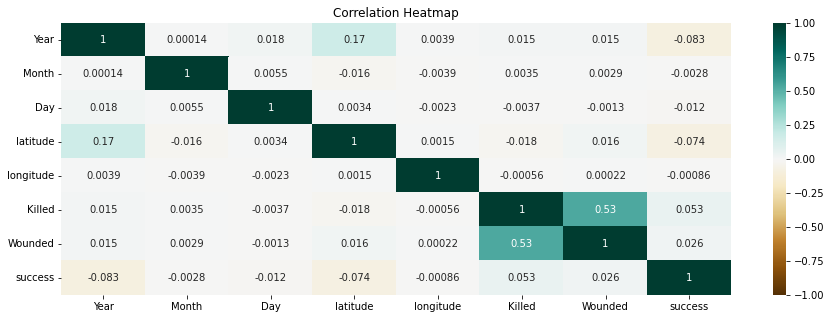

In [ ]:
# finding the correlation in the dataset 
plt.figure(figsize=(15,5))
sns.heatmap(gtd_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG').set_title('Correlation Heatmap')

#### Insights : This plot is used to investigate the dependence between multiple variables at the same time and to highlight the most correlated variables in a data table. In this visual, correlation coefficients are colored according to the value.

## **Analysis on Terrorist Attacks Worldwide**

In [ ]:
# finding the number of countries that were attacked by any terrorist groups
gtd_df['Country'].nunique()

205

 #### Insights : **205 countries** in the world are affected by terrorism according to the Dataset.









/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Success Rate of Terrorist Attacks')

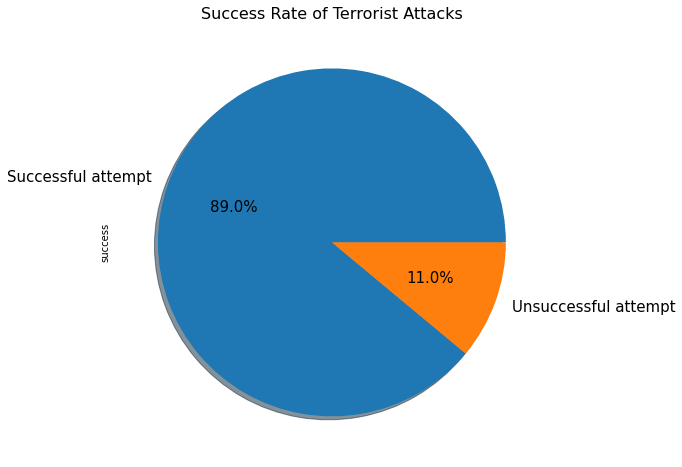

In [ ]:
# Plotting the success rate of all the attacks happened worldwide
gtd_df['success'] = gtd_df['success'].map({0:'Unsuccessful attempt', 1:'Successful attempt'})
plt.figure(figsize=(8,8))
gtd_df['success'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=15)
plt.title('Success Rate of Terrorist Attacks',fontsize = 16)

#### Insights : The **success rate** of these terrorist attacks is huge that is **89%**, this is a very big issue of concern for the security agencies around the world.

### Year wise terrorist attacks around the World

In [ ]:
# checking for null values
gtd_df['Year'].isna().sum()

0

In [ ]:
# having a look on unique years present in the dataset
gtd_df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

#### Insights : We can observe that the data for the year **1993** is missing from the dataset.

In [ ]:
# grouping attacks by year
attacks_per_year = gtd_df.groupby('Year').agg({'Year':'count'})

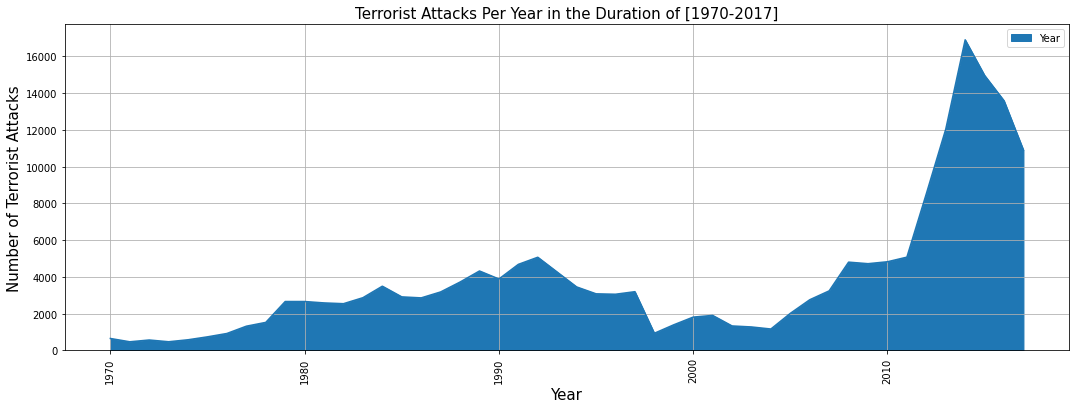

651 attacks happened in 1970 
10900 attacks happened in 2017
Total number of attacks from 1970 has increased by 1574.35 % till 2017
Average number terrorist attacks per year is 990.68


In [ ]:
# plotting the bar graph
plt.rcParams['figure.figsize'] = (18,6)
attacks_per_year.plot(kind='area')
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation = 90)
plt.ylabel('Number of Terrorist Attacks',fontsize=15)
plt.title('Terrorist Attacks Per Year in the Duration of [1970-2017]',fontsize=15)
plt.grid()
plt.show()
# Calculating the percentage of attacks that has happened from 1970 to 2017
Year = gtd_df.Year.value_counts().to_dict()
rate = ((Year[2017]-Year[1970])/Year[1970])*100
avg_attacks_per_year = gtd_df.value_counts().sum()/(gtd_df['Year'].nunique())
print(Year[1970],'attacks happened in 1970 ')
print(Year[2017],'attacks happened in 2017')
print('Total number of attacks from 1970 has increased by',np.round(rate,2),'% till 2017')
print('Average number terrorist attacks per year is',np.round(avg_attacks_per_year,2))

#### Insights : The number of attacks increased exponentially through the years from 1970 to 2017 that is around more than **15 times**.

### Number of terrorist attacks in each country and region

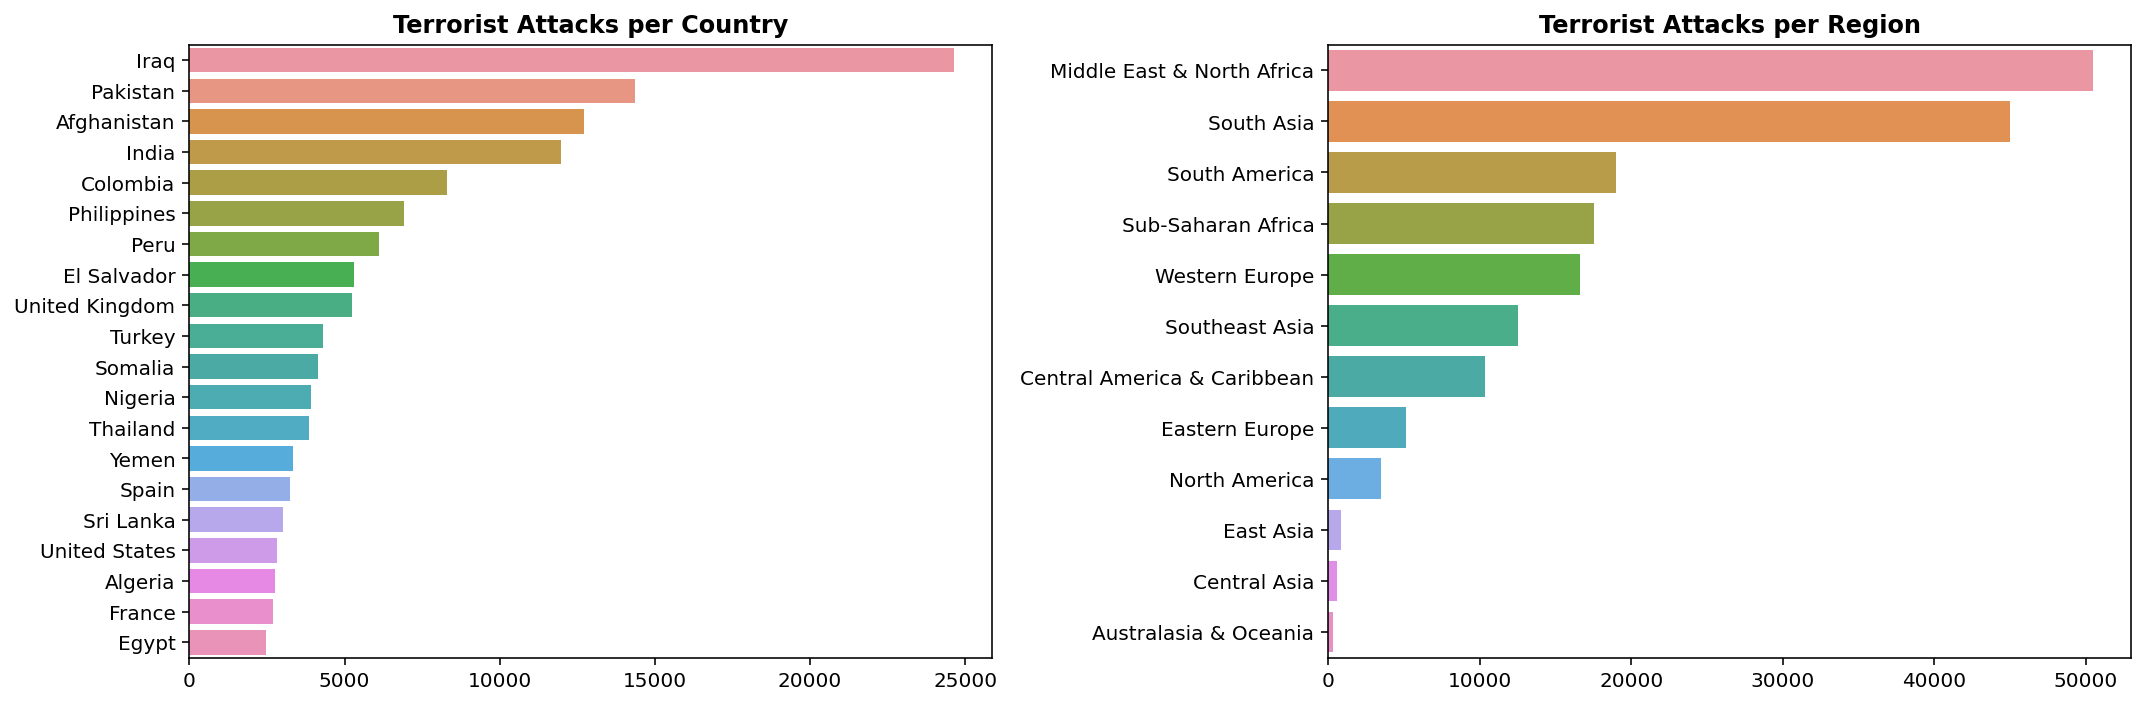

In [ ]:
fig,axes = plt.subplots(figsize=(15,5),nrows=1,ncols=2,dpi = 144)
sns.barplot(x = gtd_df['Country'].value_counts()[:20].values, y = gtd_df['Country'].value_counts()[:20].index, ax=axes[0]);
axes[0].set_title('Terrorist Attacks per Country',fontweight='bold')
sns.barplot(x=gtd_df['Region'].value_counts().values, y=gtd_df['Region'].value_counts().index, ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region',fontweight='bold')
fig.tight_layout()
plt.show()

#### The most number of attacks took place till 2017 are in Iraq **approximately 25000** which is huge in last 50 years.
#### Number of terrorist attacks are more in **Iraq, Pakistan and Afghanistan** and region wise it is more in **Middle East and North Africa** regions.

### Finding out the terrorist organizations that carried out the operations in different countries and methods used in different attacks. 

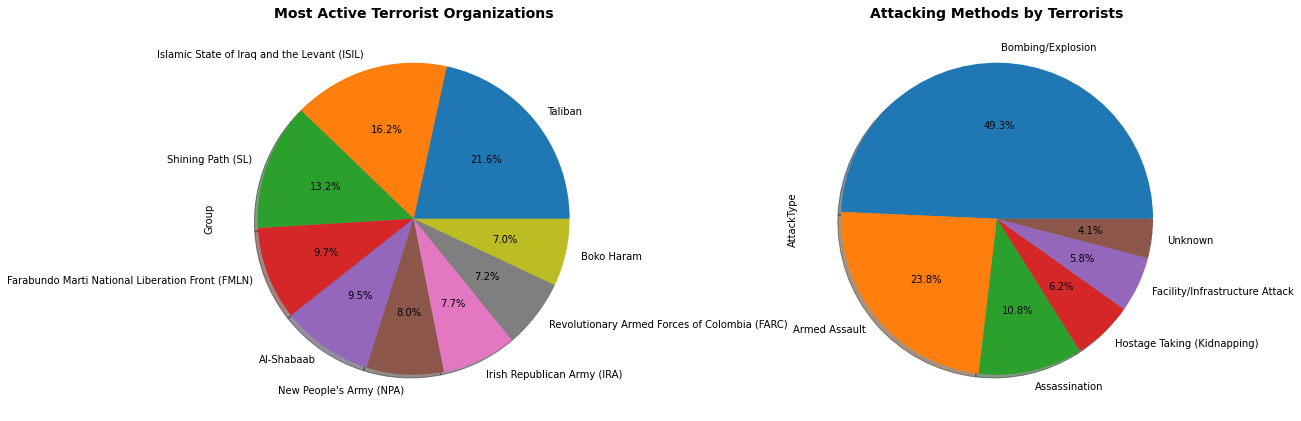

In [ ]:
fig,axes = plt.subplots(figsize=(18,15),nrows=1,ncols=2)
gtd_df['Group'].value_counts()[1:10].plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=10,ax=axes[0])
axes[0].set_title('Most Active Terrorist Organizations',fontsize=14, fontweight = 'bold')

gtd_df['AttackType'].value_counts()[0:6].plot(kind='pie',autopct='%1.1f%%',shadow=True, fontsize=10,ax=axes[1])
axes[1].set_title('Attacking Methods by Terrorists', fontsize = 14, fontweight = 'bold')
fig.tight_layout()
plt.show()

#### Insights : The most active terrorist organization is **Taliban** and the favourite attacking technique used by these organizations is **Bombing/Explosion**. 

### Favorite targets of terrorist groups

Text(0.5, 1.0, 'Favorite Targets')

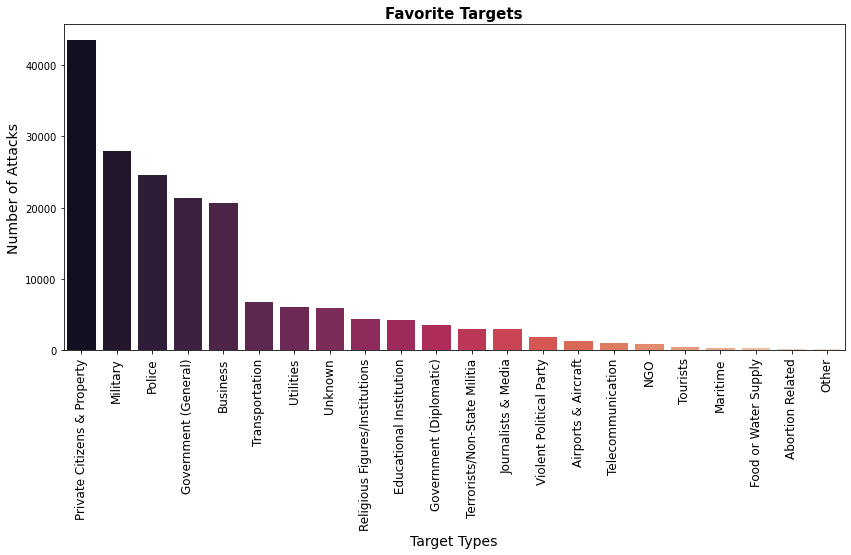

In [ ]:
# Plotting the Target Types in the attacks
plt.subplots(figsize=[14,6])
sns.countplot(x= 'Target_type', data = gtd_df, palette ='rocket', order = gtd_df['Target_type'].value_counts().index)
plt.xlabel('Target Types',fontsize = 14)
plt.ylabel('Number of Attacks',fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Favorite Targets', fontsize = 15, fontweight = 'bold')

#### Insights : The most targeted assests of these organizations are **Private Citizens & Property** followed by **Military** and **Police**.  

### Most targeted Countries of a particular terrorist group 

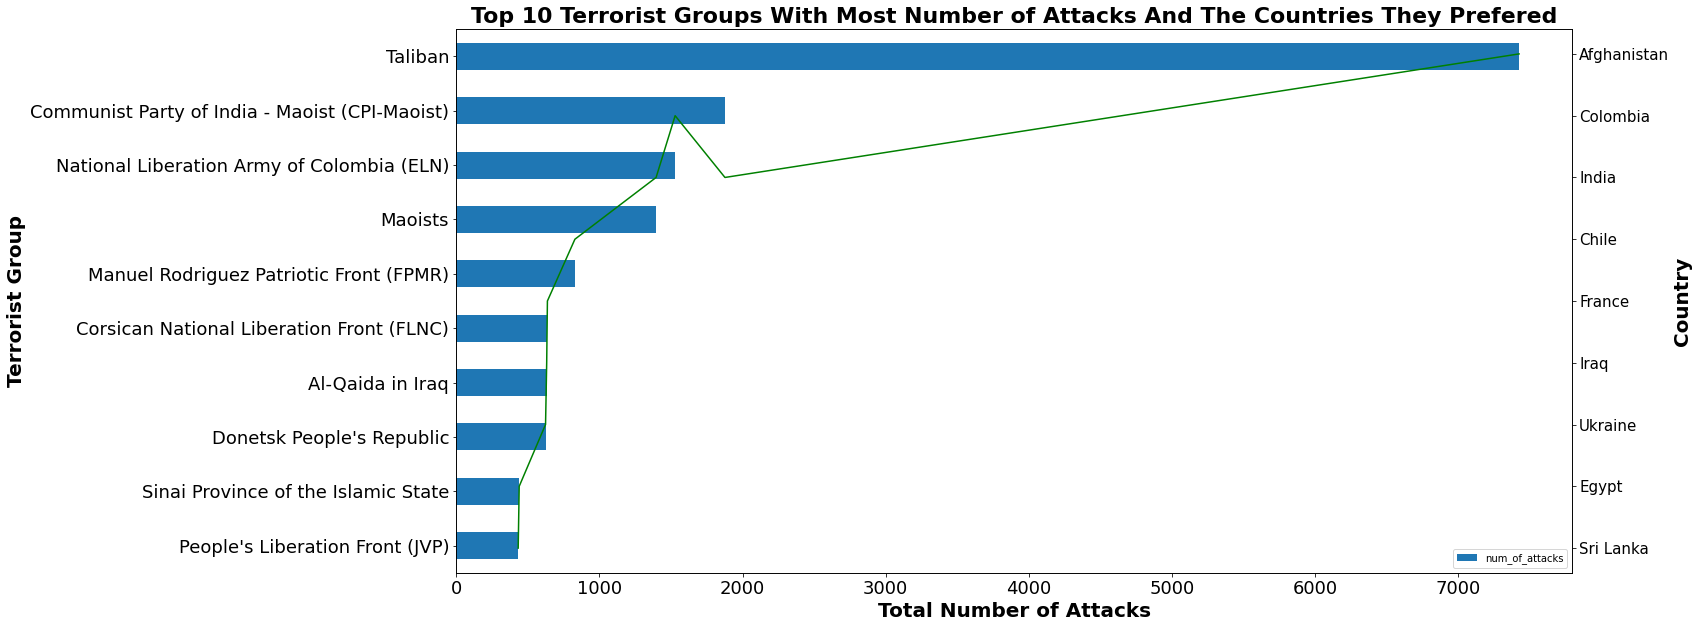

In [ ]:
# removing the unknwon terrorist groups names
country = gtd_df[gtd_df['Country']!='Unknown']
country = gtd_df[gtd_df['Group']!='Unknown']
attacks_on_country = country.groupby(['Group','Country']).agg({'Group':'count'}).rename(columns={'Group':'num_of_attacks'}).reset_index()
mode_of_country = attacks_on_country.groupby('Group')['Country'].apply(lambda x: x.mode().loc[0]).reset_index()
top_rivals = pd.merge(left=mode_of_country,right=attacks_on_country,on=['Group','Country'],how='left').nlargest(10,'num_of_attacks')
top_rivals.sort_values('num_of_attacks',ascending=True,inplace=True)

plt.rcParams["figure.figsize"] = (20,10)

a = top_rivals.plot(kind='barh', x='Group',y ='num_of_attacks',fontsize=18)
a.set_xlabel('Total Number of Attacks',fontsize=20,fontweight='bold')
a.set_ylabel('Terrorist Group',fontsize=20,fontweight='bold')
x=top_rivals.Country
y=top_rivals.num_of_attacks
b=a.twinx()
b.plot(y,x,color="G")
b.set_xlabel('Country')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.xlabel('Number of Attacks', fontsize=20)
plt.ylabel('Country', fontsize=20,fontweight='bold')
plt.title('Top 10 Terrorist Groups With Most Number of Attacks And The Countries They Prefered', fontsize=22,fontweight='bold')
plt.show()

#### Insights : **Taliban** is the terrorist organization that targeted **Afghanistan** the most.

## **Analysis on Terrorist Attacks in India**

### Finding the yearly terror attacks on India

In [ ]:
# filtering India from the Dataframe
gtd_df_India= gtd_df[gtd_df['Country']=='India']
number_of_attacks_by_year =gtd_df_India['Year'].value_counts().rename_axis('year').reset_index(name='number_of_attacks')
number_of_attacks_by_year.head()

,year,number_of_attacks
0,2016,1025
1,2017,966
2,2015,884
3,2014,860
4,2013,694


Text(0.5, 1.0, 'Number of Attacks Each Year in India')

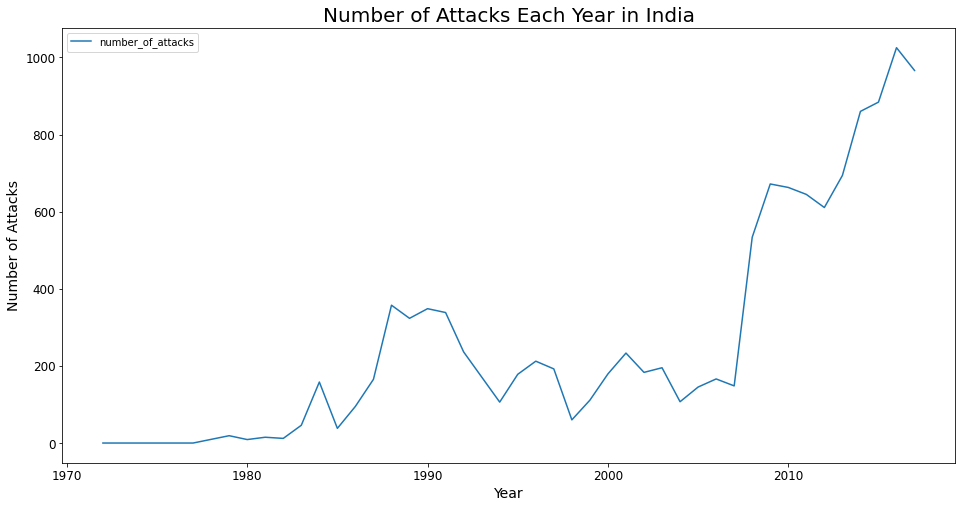

In [ ]:
# Plotting Nof of Attacks Yearwise
number_of_attacks_by_year.sort_values('year',ascending= True).plot(kind='line',x='year',y='number_of_attacks', figsize = [16,8])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Number of Attacks Each Year in India', fontsize=20)

#### Insights : We can see an **exponential growth** in the number of attacks and it's the maximum in the **year 2016** with **1025 attacks**.

### Cities with the most number of killings in India

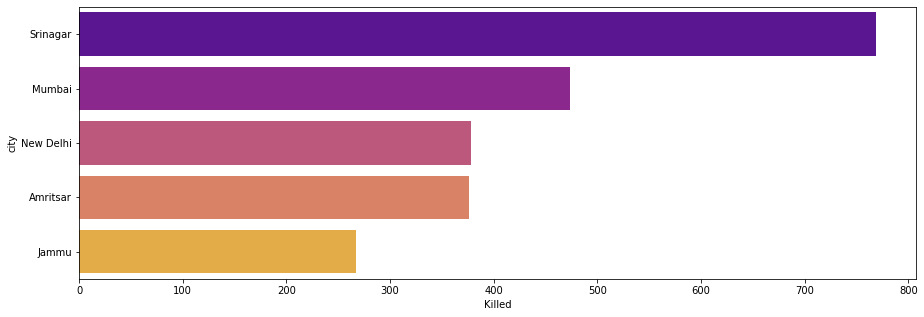

       city  Killed
0  Srinagar   769.0


In [ ]:
plt.figure(figsize=(15,5))
top_5_cities_attacked_in_India = gtd_df_India.groupby('city')['Killed'].sum().sort_values(ascending=False)[1:].reset_index().head(5)
sns.barplot(x ='Killed', y ='city', data = top_5_cities_attacked_in_India, palette ='plasma')
plt.show()
print(top_5_cities_attacked_in_India[:1])

#### Insights : **Srinaga**r was the most frequently attacked city in India which caused **540 deaths**.

### Killings happened in India every year 

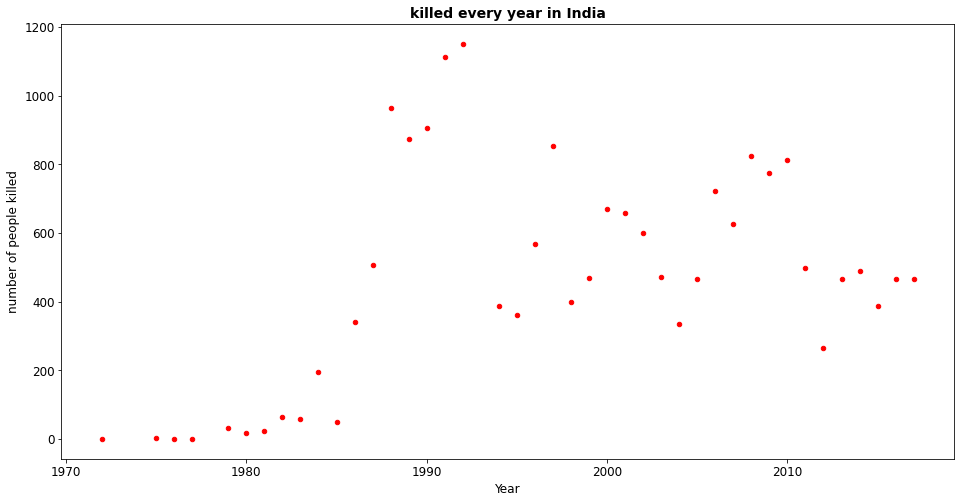

,Year,Killed
17,1992,1152.0


In [ ]:
India_df = gtd_df_India.groupby('Year')['Killed'].sum().reset_index()
India_df.plot(kind='scatter', x='Year', y='Killed' ,figsize=(16,8),fontsize=12,color='red')
plt.title('killed every year in India',fontsize=14,fontweight='bold')
plt.xlabel('Year',fontsize=12)
plt.ylabel('number of people killed',fontsize=12)
plt.show()
India_df.sort_values(by='Killed',ascending=False)[:1]

#### Insights : In the **year 1992** there were highest number of deaths in India.

### Most Number of Kills by various Terrorist Groups in India

Text(0, 0.5, 'Terrorist Group Name')

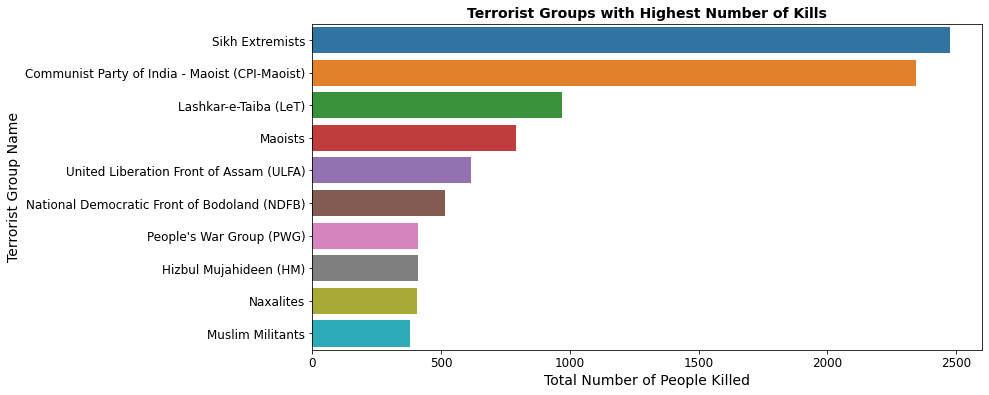

In [ ]:
plt.subplots(figsize=(12,6))
gtd_df_India = gtd_df_India.drop(gtd_df_India.loc[gtd_df_India['Group']=='Unknown'].index)
# applying groupby method on India dataframe to get killings from different terrorist groups in India
Groups_in_India = gtd_df_India.groupby('Group')['Killed'].sum().nlargest(10)
sns.barplot(y = Groups_in_India.index, x = Groups_in_India.values)
plt.title('Terrorist Groups with Highest Number of Kills', fontweight ='bold', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Total Number of People Killed',fontsize=14)
plt.ylabel('Terrorist Group Name',fontsize=14)

#### Insights : The most active terrorist groups are **Sikh Extremists** followed by **CPI-Maoist** causing the maximum number of deaths in India.

## **SUMMARY**

Global Terrorism Data Analysis has been done by two group members Vishal Sahu and Bhushan Arun Bhopaye.The database consists information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.The dataset set huge having 135 columns so we decided to divide our project work.

**Vishal:**\
I decided to do the analysis worldwide but before I start there were some hurdles like as I imported the csv file it was big so I encoded to parse it and there were 135 columns in the Data frame so the first task was to remove null columns.I calculated the percentage of null values in each column and dropped off the columns having more than 50% null values and there were a lot missing values as well so to be accurate at anlysis I filtered those values.For the sack of proper analysis I renamed columns to a better relevant name according to the dataset.\
Here are my key findings:\
During the analysis data of year 1993 was missing because of some unknown reasons.For the better understanding of the data analysis I used different graphs to visualize the data and I chose the graphs according to the data. I analysed that from the year 1970 to 2017 the average number of attacks were around 990 attacks each year and the increase in the attacks was drastic that was 15 times and whenever an attack took place it's probability of getting successful was 89% which very high.And these attacks were covering 205 countries around the world that is approximatel 95% of the world so we can say that terrorist have taken place all around the world that not a great news to hear.The most active terrorist group was Taliban around the world which make them the most dangerous terrorist group and the most attacked country was Iraq which was around 25000 and the most attacked region was Midddle East and North Africa followed by South Asia.

**Bhushan:**\
Initially I started with looking at  database available to us for the GTD project. I went through various columns available within GTD  database tried to make sense of what all data is available to us. I took useful columns and understood that it contained details of each and every terrorist acttack mostly focused on India. I quickly understood that we can found some common statistics pertaining to terrorism. I found out some of the statistics such as Cities with the most number of killings by terrorist in India. I also tried looking into find which organization ares mostly involve into terrorist activity. I quikly understand some statistic related to attacks and found that the most active terrorist groups are Sikh Extremists followed by CPI-Maoist causing the maximum number of deaths in India. For the better understanding of the data analysis I used different graphs to visualize the data and I chose the graphs according to the data. I analysed that in the year 1992 there were highest number of deaths in India and for better understanding I use scatter plot for better visualisation. IN year 1992, 1150 people loss there life.  We can see an exponential growth in the number of attacks and it's the maximum in the year 2016 with 1025 attacks and this is peak year with respect to attack. However, Shreenagar witness highest number kills almost 540 people loss there life followed by Mumbai and Newdelhi. 



## **Conclusions**

1.	The success rate of these terrorist attacks is huge that is 89%, this is a very big issue of concern for the security agencies around the world
2.	205 countries in the world are affected by terrorism according to the Dataset.

3.	The most number of attacks took place till 2017 are in Iraq approximately 25000 which is huge in last 50 years.

4.	Number of terrorist attacks are more in Iraq, Pakistan and Afghanistan and region wise it is more in Middle East and North Africa regions.

5.	The most targeted assets of these organizations are Private Citizens & Property followed by Military and Police.

6.	Taliban is the terrorist organization that targeted Afghanistan the most.

7.	Srinagar was the most frequently attacked city in India which caused 540 deaths.

8. The most active terrorist groups are Sikh Extremists followed by CPI-Maoist causing the maximum number of deaths in India.